<a href="https://colab.research.google.com/github/samsharm/Python/blob/master/Classification_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Generating the dataset
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1)
scalar = MinMaxScaler()
scalar.fit(X)
X = scalar.transform(X)

In [5]:
#Split the data
# train test split
X_train, y_train = X[:160], y[:160]     #split train:test in 160:40
X_test, y_test = X[160:], y[160:] 

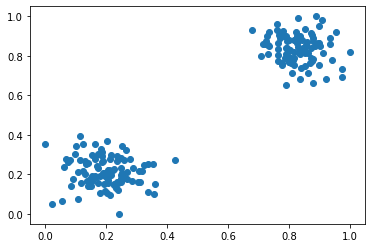

In [6]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [7]:
#Define the model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Print initial weights
weights = model.layers[0].get_weights()
w_init = weights[0]
b_init = weights[1]
print("Logistic regression model is initialized with weights - {} and biases - {}".format(w_init, b_init))

Logistic regression model is initialized with weights - [[-0.20197177  0.47624302 -0.30419588  0.16265368]
 [ 0.20946693 -0.8441007  -0.8719194   0.20077753]] and biases - [0. 0. 0. 0.]


In [9]:
#Train the Neural Network
history = model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 2ms/step - loss: 0.6489 - accuracy: 0.4879
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.4549
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.4847
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 0.6456 - accuracy: 0.4647
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.5411
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6274 - accuracy: 0.5567
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.4698
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.5624
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.5533
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6157 - accuracy: 0.6014
Epoch 11/100
5/5 [===========

In [10]:
#Train the model
print('\nTesting ------------')
cost = model.evaluate(X_test, y_test, batch_size=40)
print('test cost:', cost)
weights = model.layers[0].get_weights()
W = weights[0]
b = weights[1]
print('Weights=', W, '\nbiases=', b)


Testing ------------
1/1 [==============================] - 0s 120ms/step - loss: 0.1430 - accuracy: 1.0000
test cost: [0.14299234747886658, 1.0]
Weights= [[ 0.22214748  0.11497065 -0.30419588  0.56690353]
 [ 0.6142174  -0.87181205 -0.8719194   0.58511794]] 
biases= [-0.08567603  0.66606253  0.         -0.13637702]
